In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Indian_cities.csv")
df.head()

,City,State,Latitude,Longitude
0,Nanjangud,Karnataka,12.120000,76.680000
1,Chittorgarh,Rajasthan,24.879999,74.629997
2,Ratnagiri,Maharashtra,16.994444,73.300003
3,Goregaon,Maharashtra,19.155001,72.849998
4,Pindwara,Rajasthan,24.794500,73.055000


In [4]:
print("The shape of the dataset is {}, Hence the size is {}".format(df.shape,df.size))

The shape of the dataset is (791, 4), Hence the size is 3164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       791 non-null    object 
 1   State      791 non-null    object 
 2   Latitude   791 non-null    float64
 3   Longitude  791 non-null    float64
dtypes: float64(2), object(2)
memory usage: 24.8+ KB


In [6]:
df.describe()

,Latitude,Longitude
count,791.000000,791.000000
mean,21.749847,79.076990
std,5.966016,5.003221
min,8.158933,69.605965
25%,17.680277,75.648387
50%,22.597921,77.807236
75%,26.282626,81.523899
max,34.556335,95.180000


In [7]:
df['State'].unique()

array(['Karnataka', 'Rajasthan', 'Maharashtra', 'Chhattisgarh',
       'Uttar Pradesh', 'Delhi', 'West Bengal', 'Jharkhand', 'Gujarat',
       'Kerala', 'Puducherry', 'Odisha', 'Haryana', 'Bihar', 'Tamil Nadu',
       'Punjab', 'Andhra Pradesh', 'Andaman and Nicobar Islands',
       'Uttarakhand', 'Telangana', 'Madhya Pradesh', 'Assam',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Mizoram', 'Sikkim',
       'Goa', 'Manipur', 'Tripura', 'Daman and Diu', 'Nagaland',
       'Chandigarh'], dtype=object)

In [8]:
df['State'].nunique()

32

In [9]:
#number of cities statewise
df.groupby(["State"]).count()

,City,Latitude,Longitude
State,,,
Andaman and Nicobar Islands,1,1,1
Andhra Pradesh,41,41,41
Assam,17,17,17
Bihar,37,37,37
Chandigarh,1,1,1
Chhattisgarh,16,16,16
Daman and Diu,1,1,1
Delhi,4,4,4
Goa,3,3,3


In [10]:
df['City'].count()

791

In [11]:
df.isnull().sum()

City         0
State        0
Latitude     0
Longitude    0
dtype: int64

**Exploratory Data Analysis**

Import the visualization libraries

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()

As the dataset contains cities from almost every state of India & these values represent actual representaion on the earth,
so if we plot longitude vs latitude graph we get the result similar to indian geographical map.

<ipython-input-13-a3a438aeb778>:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

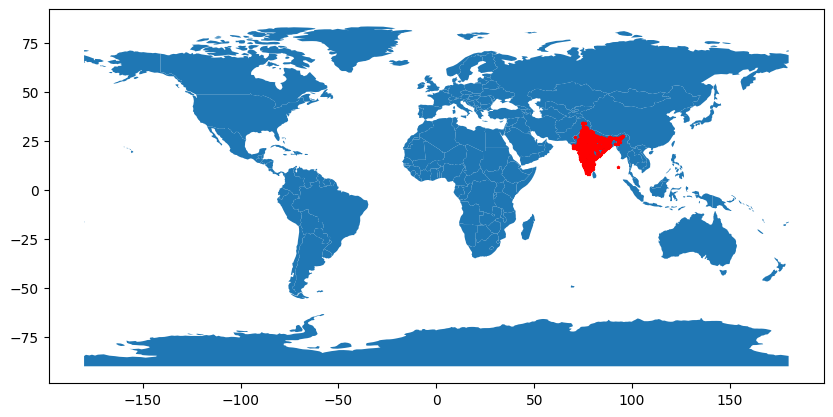

In [13]:
#Ploting Longitude and lattitude points on world map

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot( figsize=(10, 8)),marker='*', color='red', markersize=3)

In [14]:
import plotly.express as px

fig = px.scatter(df,x='Longitude',y='Latitude',title='Longitude vs Latitude Plot showcasing diff Cities',width=1000,height=800,hover_name='City')
fig.show()

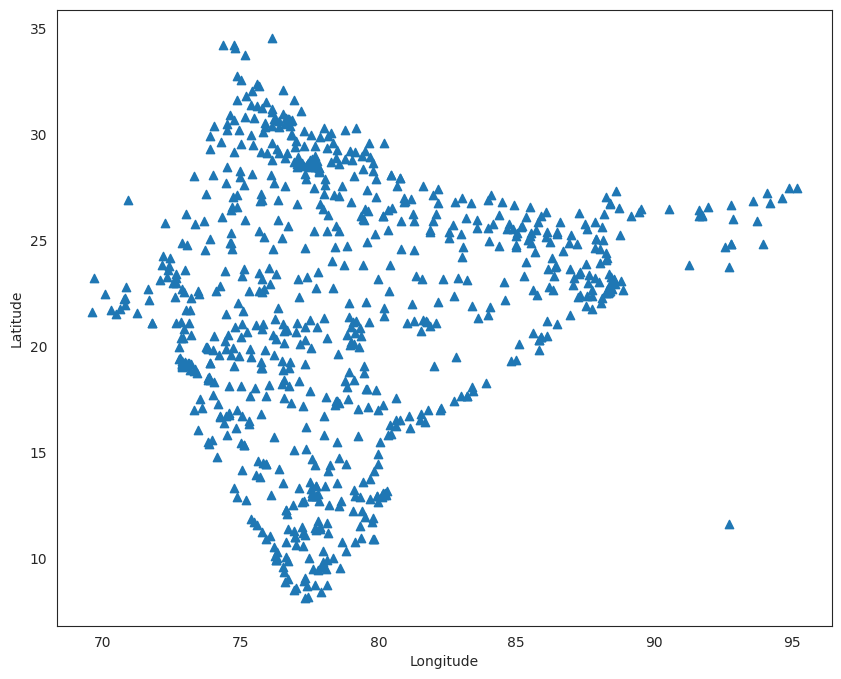

In [15]:
sns.set_style('white')
plt.figure(figsize=(10,8))
plt.scatter(df['Longitude'],df['Latitude'],marker='^')
plt.xlabel('Longitude')
plt.ylabel("Latitude")
plt.show()

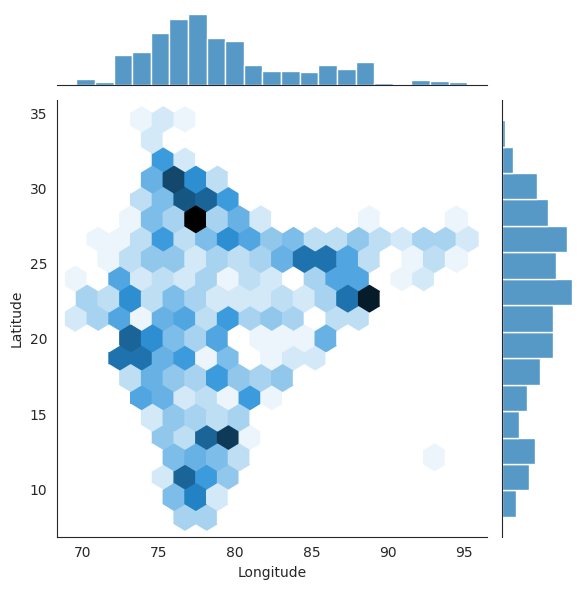

In [16]:
sns.jointplot(x='Longitude',y='Latitude',data=df,kind='hex');

**Latitude Distribution**

Latitude Distribution
Latitude is the the distance of a place north or south of the line that we imagine around the middle of the earth (the equator)

In [17]:
#city with lowest latitude
#at the lower tip of the indian map
df[df['Latitude']==df['Latitude'].min()]

,City,State,Latitude,Longitude
543,Kattuvilai,Tamil Nadu,8.158933,77.336746


In [18]:
#city with highest latitude
#at the upper tip of the indian map
sns.set_style("darkgrid")
df[df['Latitude']==df['Latitude'].max()]

,City,State,Latitude,Longitude
650,Kargil,Jammu and Kashmir,34.556335,76.132507


In [19]:
#latitude distribution
df['Latitude'].iplot(kind='hist',title='latitude distribution',color='green')

In [20]:
#latitude distribution
df['Latitude'].iplot(kind='box',title='latitude distribution',color='lightgreen')

**Longitude Distribution**


Longitude is the distance of a place east or west of a line from the North Pole to the South Pole that passes through Greenwich in London.


In [21]:
#city with the highest longitude
#at the east side of the india

df[df['Longitude']==df['Longitude'].max()]

,City,State,Latitude,Longitude
350,Chabua,Assam,27.48,95.18


In [22]:
#city with the lowest longitude
#at the west end of the indian map
df[df['Longitude']==df['Longitude'].min()]

,City,State,Latitude,Longitude
117,Porbandar,Gujarat,21.640575,69.605965


In [23]:
#longitude distribution
df['Longitude'].iplot(kind='hist',title='longitude distribution',color='blue')

In [24]:
#Longitude distribution
df['Longitude'].iplot(kind='box',title='Longitude distribution',color='skyblue')

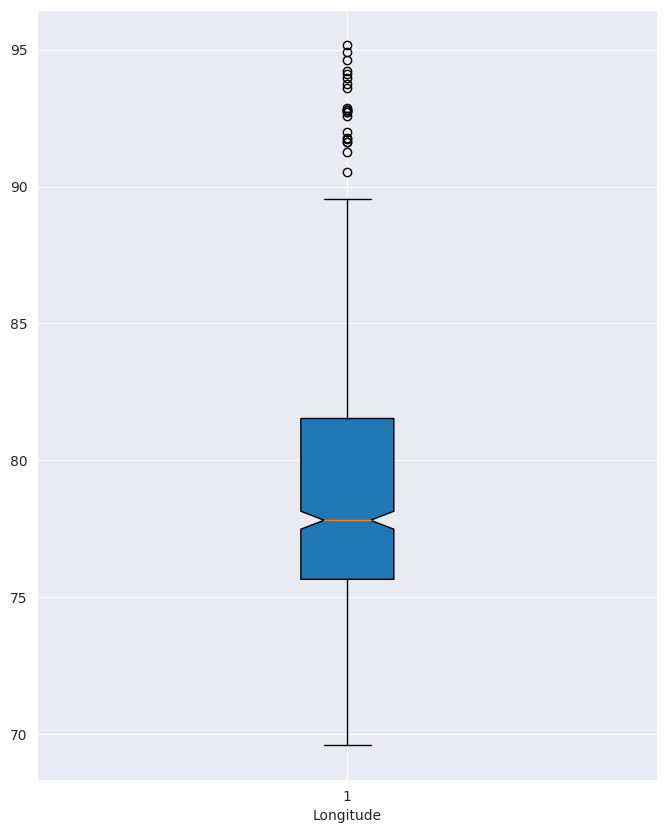

In [25]:
#boxplot showing the distribution with some outliers
#outliers showcasing cities on the east side of India
fig=plt.figure(figsize=(8,10))
plt.boxplot(df['Longitude'],patch_artist=True,notch=True)
plt.xlabel('Longitude');

In [34]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Indian_cities.csv')


<ipython-input-36-0d8daaf9533f>:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



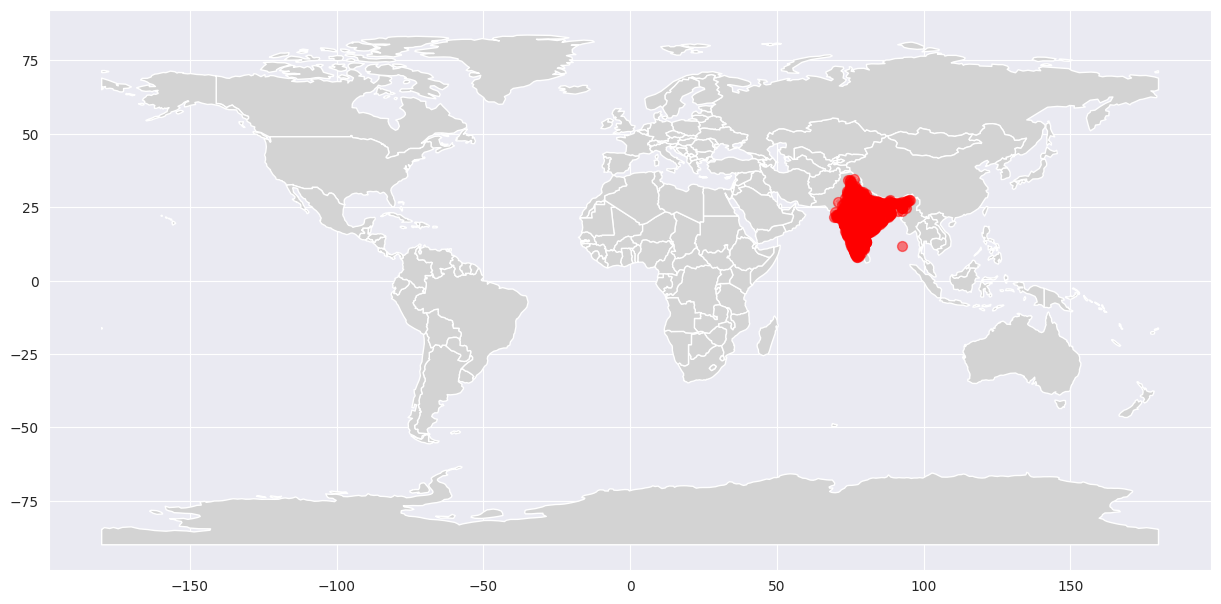

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the loaded dataset
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

# Plot the cities on a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10), color='lightgrey')
gdf.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



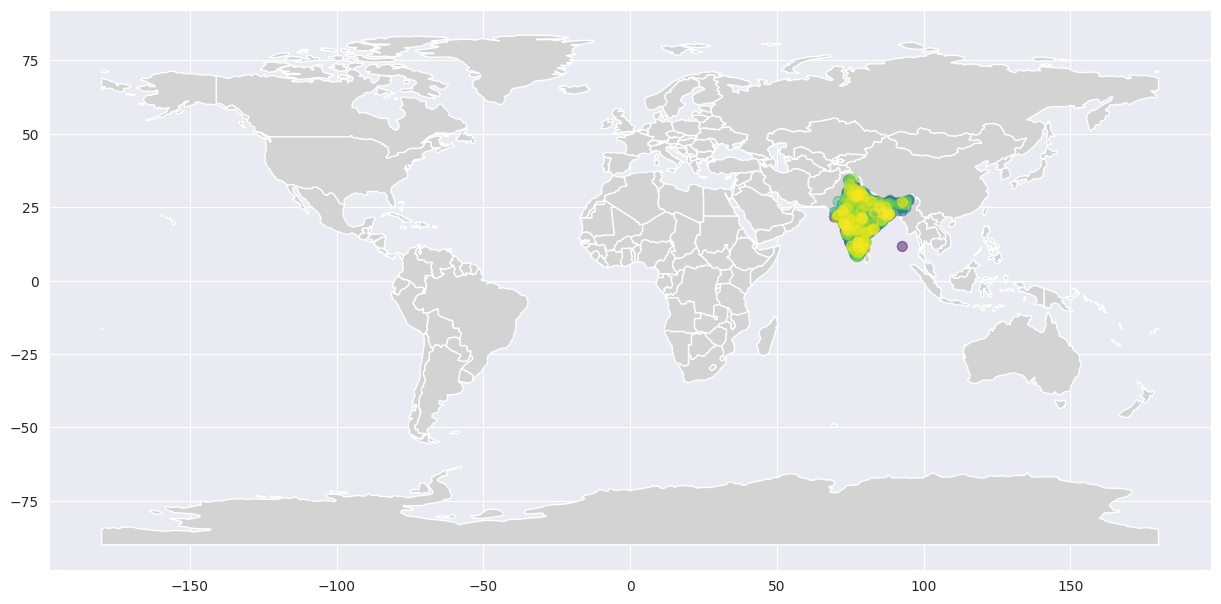

In [39]:
from sklearn.cluster import KMeans

# Example: Perform K-means clustering on population density
X = data[['Longitude']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
data['cluster'] = kmeans.labels_

# Visualize the clusters on the map
ax = world.plot(figsize=(15, 10), color='lightgrey')
gdf.plot(ax=ax, marker='o', c=data['cluster'], cmap='viridis', markersize=50, alpha=0.5, legend=True)
plt.show()


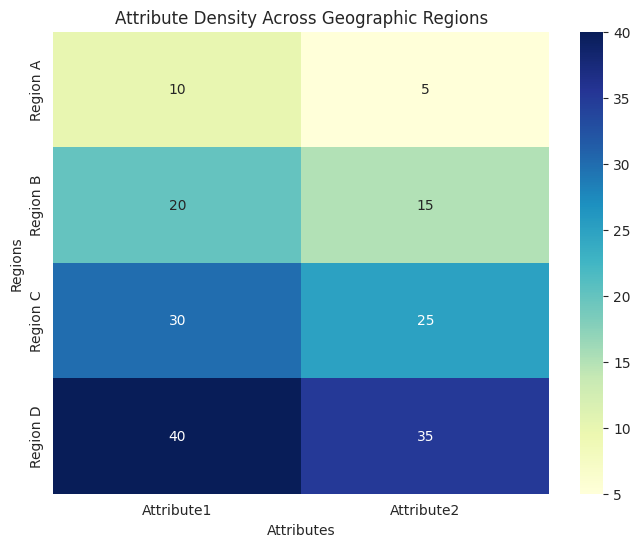

In [48]:
import folium
from folium.plugins import HeatMap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Region': ['Region A', 'Region B', 'Region C', 'Region D'],
    'Attribute1': [10, 20, 30, 40],
    'Attribute2': [5, 15, 25, 35]
}



# Reshape the data for heatmap
heatmap_data = df.set_index('Region')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Attribute Density Across Geographic Regions')
plt.xlabel('Attributes')
plt.ylabel('Regions')
plt.show()


In [51]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Indian_cities.csv')

In [54]:
import folium
from folium.plugins import HeatMap

# Create a folium map centered at the mean coordinates of the cities
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=2)

# Create a HeatMap layer for population density
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m